In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../data/clean_data.csv")

In [3]:
# display the first 5 rows of DataFrame
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group,education_group
0,39,77516,2174,0,40,0,Other,0,Family,1,0,1,1,Bachelor's Degree
1,50,83311,0,0,13,0,Management,1,Spouse,1,0,1,1,Bachelor's Degree
2,38,215646,0,0,40,0,Skilled,0,Family,1,1,1,1,High School Graduation
3,53,234721,0,0,40,0,Skilled,1,Spouse,1,1,0,1,Secondary
4,28,338409,0,0,40,0,Professional,1,Spouse,0,1,0,0,Bachelor's Degree


In [4]:
## Split the data into Independent and dependent features
X = df.drop(labels=['income'],axis=1)
Y = df[['income']]

In [5]:
X

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group,education_group
0,39,77516,2174,0,40,Other,0,Family,1,0,1,1,Bachelor's Degree
1,50,83311,0,0,13,Management,1,Spouse,1,0,1,1,Bachelor's Degree
2,38,215646,0,0,40,Skilled,0,Family,1,1,1,1,High School Graduation
3,53,234721,0,0,40,Skilled,1,Spouse,1,1,0,1,Secondary
4,28,338409,0,0,40,Professional,1,Spouse,0,1,0,0,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,257302,0,0,38,Other,1,Spouse,1,1,1,0,Associate's Degree
32533,40,154374,0,0,40,Skilled,1,Spouse,1,1,1,1,High School Graduation
32534,58,151910,0,0,40,Other,0,Family,1,1,1,0,High School Graduation
32535,22,201490,0,0,20,Other,0,Child,1,1,1,1,High School Graduation


In [6]:
Y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32532,0
32533,1
32534,0
32535,0


In [29]:
Y.value_counts()

income
0         24698
1          7839
Name: count, dtype: int64

**Observation: Imbalanced Income Categories**

The dataset contains information about individual incomes, categorized into two groups: "Income Less Than 50K" and "Income More Than 50K." A quick examination of the data reveals a significant class imbalance between these categories.

- The "Income Less Than 50K" category comprises 24,698 individuals.
- The "Income More Than 50K" category consists of only 7,839 individuals.

This class imbalance could potentially impact the performance of machine learning models, as they may struggle to accurately predict the minority class ("Income More Than 50K"). Addressing class imbalance is crucial for ensuring fair and effective model predictions.


In [7]:
# Divide the columns into categorical and numerical
numerical_cols = X.select_dtypes(exclude='object').columns
categorical_cols = ["education_group"]
categorical_cols1 = ['occupation_group','Relationship_Group']

In [8]:
# Define the custom ranking for ordinal variable

edu_category = ['Primary', 'Secondary', 'High School Graduation', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Professional Degree", 'Doctorate Degree']

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

## pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
# Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median'))
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[edu_category])),
    ]
)

cat_pipeline1=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehotencoder',OneHotEncoder(handle_unknown = "ignore")),
    ]
)

# Combine
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols),
('cat_pipeline1',cat_pipeline1,categorical_cols1)
])

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.28,random_state=13, stratify=Y)

In [12]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [13]:
X_train

,num_pipeline__age,num_pipeline__fnlwgt,num_pipeline__capital-gain,num_pipeline__capital-loss,num_pipeline__hours-per-week,num_pipeline__marital_status_group,num_pipeline__native_group,num_pipeline__workclass_group,num_pipeline__race_group,num_pipeline__sex_group,cat_pipeline__education_group,cat_pipeline1__occupation_group_Management,cat_pipeline1__occupation_group_Other,cat_pipeline1__occupation_group_Professional,cat_pipeline1__occupation_group_Sales,cat_pipeline1__occupation_group_Service,cat_pipeline1__occupation_group_Skilled,cat_pipeline1__Relationship_Group_Child,cat_pipeline1__Relationship_Group_Family,cat_pipeline1__Relationship_Group_Spouse
0,20.0,293297.0,0.0,0.0,35.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,50.0,137253.0,0.0,0.0,40.0,1.0,1.0,1.0,1.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20.0,273701.0,34095.0,0.0,10.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,54.0,127943.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,46.0,207677.0,0.0,0.0,30.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,62.0,270092.0,0.0,0.0,40.0,1.0,1.0,1.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23422,36.0,469056.0,0.0,0.0,25.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23423,39.0,114844.0,0.0,1876.0,50.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23424,43.0,282069.0,0.0,0.0,42.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
X_train.shape

(23426, 20)

In [15]:
y_train.shape

(23426, 1)

In [16]:
X_test.shape

(9111, 20)

In [17]:
y_test.shape

(9111, 1)

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import xgboost as xgb
from scipy.stats import uniform, randint

# Decision Tree hyperparameter tuning
dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 3]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_

# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 150, 250],
    'max_depth': [None, 5, 10],
    'class_weight': ['balanced', None]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

# Define hyperparameter search space
xg_params = {
    "learning_rate": uniform(0.1, 0.5),
    "max_depth": randint(3, 5),
    "n_estimators": randint(100, 150),
    "scale_pos_weight": [2.6, 3],  # assigns a weight to the positive class
}

# Create XGBoost model
xg_model = xgb.XGBClassifier()

# Create RandomizedSearchCV instance
xg_random_search = RandomizedSearchCV(
    xg_model,
    param_distributions=xg_params,
    n_iter=32,  # Number of random combinations to try
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
xg_random_search.fit(X_train, y_train)
# Get the best estimator
best_xg_model = xg_random_search.best_estimator_

# Bagging
bagging_model = BaggingClassifier(base_estimator=dt_best_model, n_estimators=100)
bagging_model.fit(X_train, y_train)

# Boosting
param_grid = {
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'n_estimators': [100, 500, 1000]
}
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and evaluate on the test set
boosting_best_model = grid_search.best_estimator_

#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Evaluate models
models = {
    'Decision Tree': dt_best_model,
    'Random Forest': rf_best_model,
    'Bagging': bagging_model,
    'AdaBoost': boosting_best_model,
    'Logistic Regression' : log_model,
    'XGB_Classifier' : best_xg_model
}

for model_name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, train_pred)
    accuracy_test = accuracy_score(y_test, test_pred)
    precision_train = precision_score(y_train, train_pred)
    precision_test = precision_score(y_test, test_pred)
    recall_train = recall_score(y_train, train_pred)
    recall_test = recall_score(y_test, test_pred)
    f1_train = f1_score(y_train, train_pred)
    f1_test = f1_score(y_test, test_pred)
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test = roc_auc_score(y_test, test_pred)
    
    print(f"Model: {model_name}")
    print("Train - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
        accuracy_train, precision_train, recall_train, f1_train, auc_train
    ))
    print("Test - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC: {:.4f}".format(
        accuracy_test, precision_test, recall_test, f1_test, auc_test
    ))
    print()

# Find the best model based on test accuracy
best_model_name = max(models, key=lambda x: f1_score(y_test, models[x].predict(X_test)))

print("Best Model: ", best_model_name)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Model: Decision Tree
Train - Accuracy: 0.8617, Precision: 0.8392, Recall: 0.5271, F1-score: 0.6475, AUC: 0.7475
Test - Accuracy: 0.8523, Precision: 0.8175, Recall: 0.4979, F1-score: 0.6189, AUC: 0.7313

Model: Random Forest
Train - Accuracy: 0.8263, Precision: 0.5920, Recall: 0.8972, F1-score: 0.7133, AUC: 0.8505
Test - Accuracy: 0.8133, Precision: 0.5748, Recall: 0.8651, F1-score: 0.6907, AUC: 0.8310

Model: Bagging
Train - Accuracy: 0.8633, Precision: 0.8343, Recall: 0.5399, F1-score: 0.6556, AUC: 0.7529
Test - Accuracy: 0.8545, Precision: 0.8133, Recall: 0.5139, F1-score: 0.6298, AUC: 0.7382

Model: AdaBoost
Train - Accuracy: 0.8715, Precision: 0.7918, Recall: 0.6332, F1-score: 0.7037, AUC: 0.7902
Test - Accuracy: 0.8671, Precision: 0.7874, Recall: 0.6141, F1-score: 0.6900, AUC: 0.7807

Model: Logistic Regression
Train - Accuracy: 0.8000, Precision: 0.7250, Recall: 0.2737, F1-score: 0.3974, AUC: 0.6204
Test - Accuracy: 0.

In [19]:
from sklearn.metrics import classification_report, roc_curve
y_pred = best_xg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      6916
           1       0.64      0.83      0.72      2195

    accuracy                           0.85      9111
   macro avg       0.79      0.84      0.81      9111
weighted avg       0.87      0.85      0.85      9111



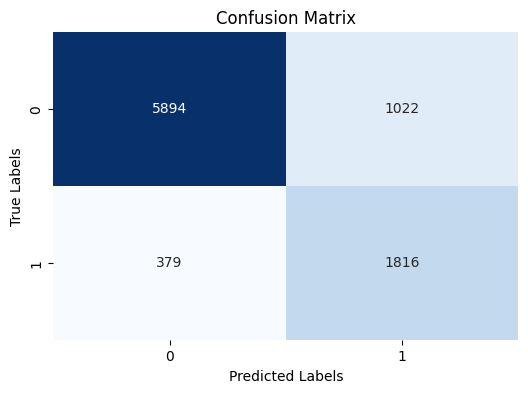

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Predict probabilities of the positive class
y_pred_prob = best_xg_model.predict_proba(X_test)[:, 1]

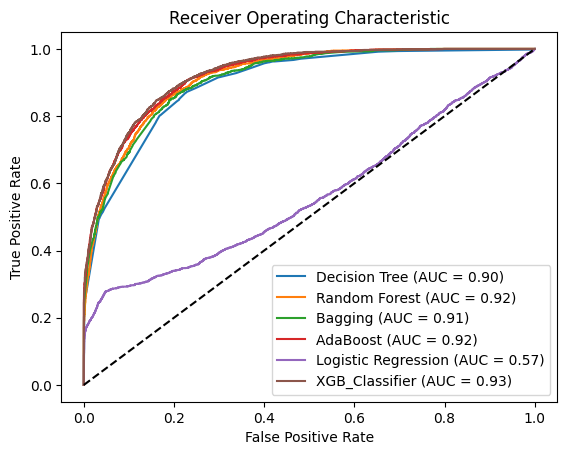

In [21]:
# Create an empty list to store AUC scores for each model
auc_scores = []

# Calculate and plot ROC-AUC curve for each model
plt.figure()
for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = models[model_name]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    auc_scores.append(auc_score)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model_name, auc_score))

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show the plot
plt.show()

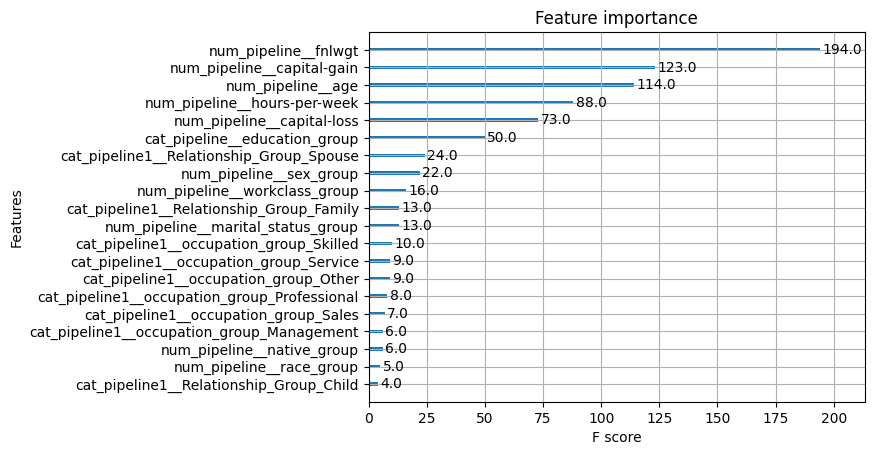

In [34]:
# Plot feature importance
xgb.plot_importance(best_xg_model)
plt.show()

In [28]:
print(f"XGBoost Best Parameters: {xg_random_search.best_params_}")
print(f"Decision Tree Best Parameters: {dt_grid.best_params_}")
print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Adaboost Best Parameters: {grid_search.best_params_}")

XGBoost Best Parameters: {'learning_rate': 0.4313788899225024, 'max_depth': 3, 'n_estimators': 122, 'scale_pos_weight': 2.6}
Decision Tree Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 150}
Adaboost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 1000}
